# *1. Problem Statement*
# **Advanced Market Segmentation Using Deep Clustering Targeting Customers with Deep Learning**

In [4]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
data=pd.read_csv("/content/Mall_Customers.csv")

# **EDA**
# Data Preprocessing

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Check IsNull
print(pd.isnull(data).sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# **Data Analysis**

<ipython-input-9-96e0c461133b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

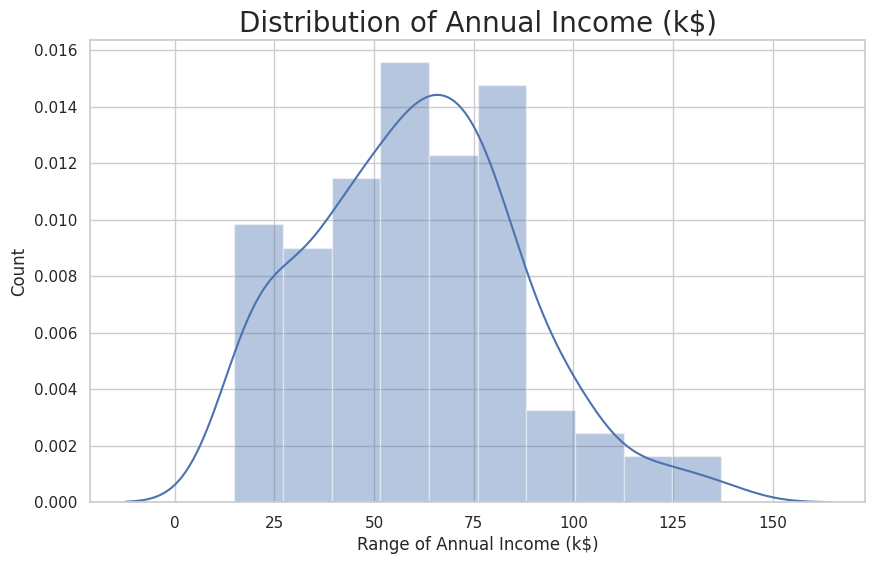

In [9]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

<ipython-input-10-d32a8f494b26>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

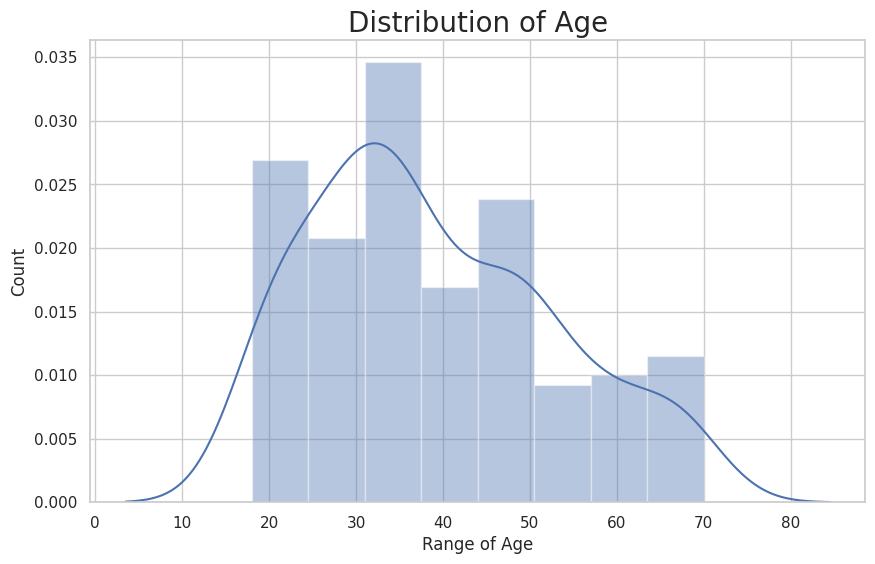

In [10]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

<ipython-input-11-f983fa877608>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

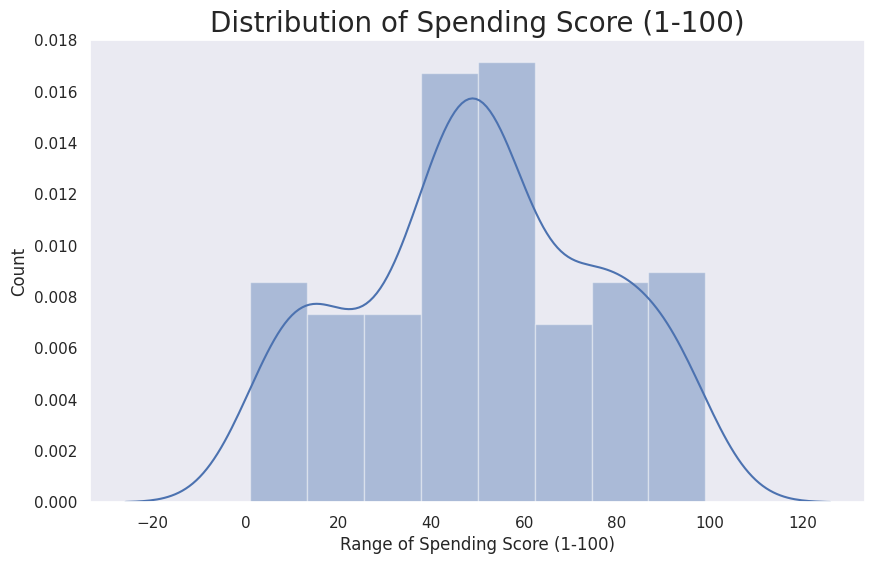

In [11]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'dark')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

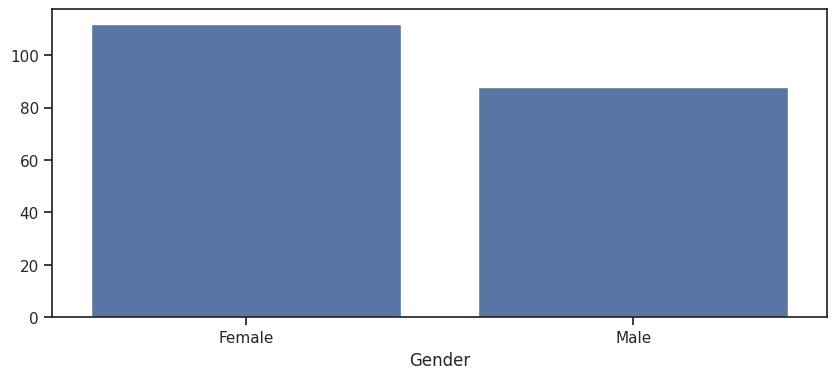

In [12]:
genders = data.Gender.value_counts()
sns.set_style("ticks")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [13]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [14]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


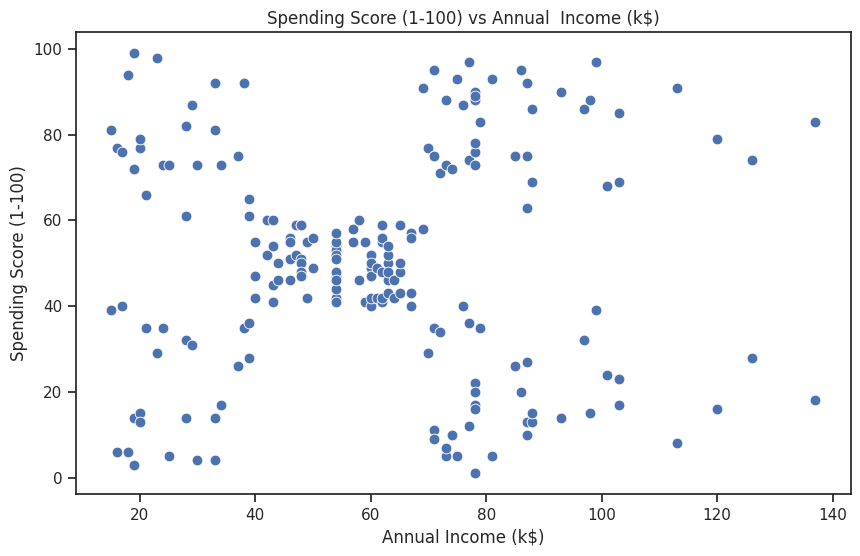

In [15]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual  Income (k$)')
plt.show()

# **Model Training and Evaluation**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import joblib


In [17]:
# Selecting relevant features
X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Build Deep Embedded Clustering (DEC) Autoencoder
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(32, activation='relu')(encoded)


In [20]:
# Decoder
decoder = Dense(64, activation='relu')(encoded)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)


In [21]:
# Compile Autoencoder
autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [22]:

# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 1.2283 - val_loss: 1.2444
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.3467 - val_loss: 1.2262
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.1292 - val_loss: 1.2149
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0742 - val_loss: 1.2242
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9742 - val_loss: 1.2527
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8532 - val_loss: 1.2575
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7711 - val_loss: 1.2166
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7101 - val_loss: 1.1620
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6201 - val_loss: 1.1398
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5752 - val_loss: 1.1373
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6219 - val_loss: 1.1381
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5594 - val_loss: 1.1284
E

In [23]:
# Extract Latent Features
encoder = Model(input_layer, encoded)
latent_features = encoder.predict(X_scaled)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


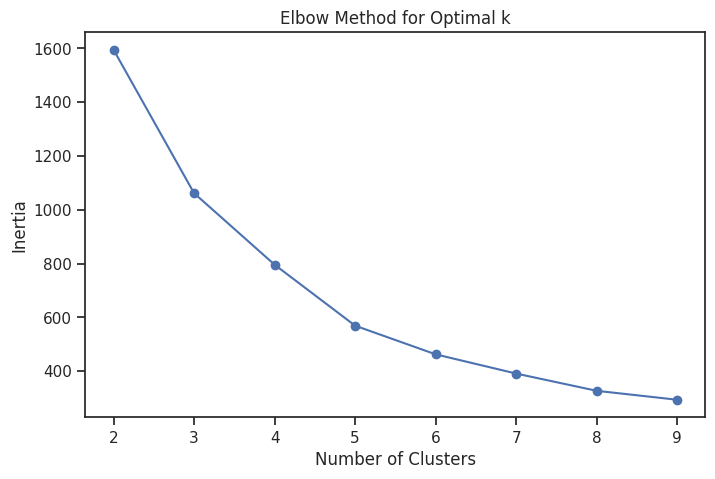

In [24]:
# Determine Optimal Clusters using Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(latent_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [25]:

# Choose the best k (from elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(latent_features)


KMeans(n_clusters=5, random_state=42)

In [26]:

# Save the models
encoder.save("encoder_model.h5")
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [27]:

# Predict clusters
data["Cluster"] = kmeans.predict(latent_features)

# Evaluate clustering with Silhouette Score
sil_score = silhouette_score(latent_features, data["Cluster"])
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.436


# **Model Visualization using TSNE Visualization**

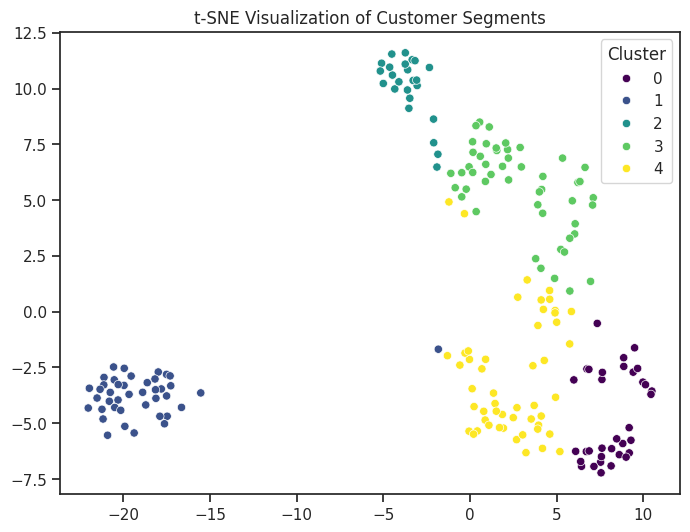

In [29]:

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(latent_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=data["Cluster"], palette='viridis')
plt.title("t-SNE Visualization of Customer Segments")
plt.show()

# **Model Prediction using user input**

In [31]:
encoder = tf.keras.models.load_model("encoder_model.h5")
kmeans = joblib.load("kmeans_model.pkl")
scaler = joblib.load("scaler.pkl")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Predicted Cluster: 1


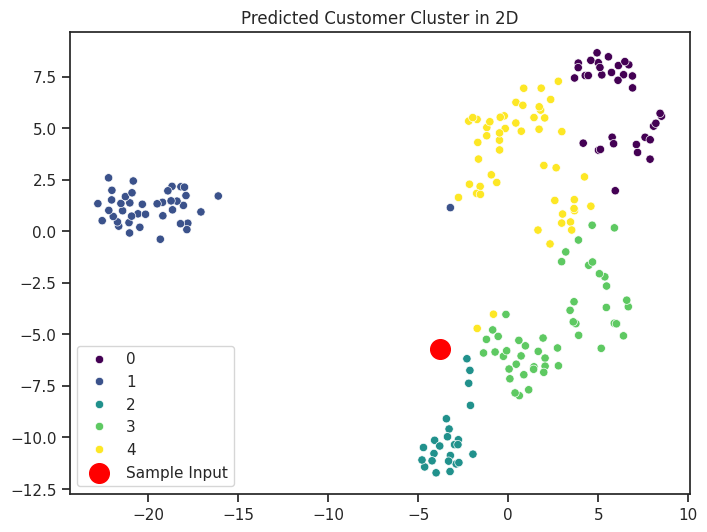

In [32]:
# Function for visual prediction
def predict_and_visualize(sample_input):
    sample_scaled = scaler.transform([sample_input])
    sample_latent = encoder.predict(sample_scaled)
    cluster = kmeans.predict(sample_latent)
    print(f"Predicted Cluster: {cluster[0]}")

    # 2D Visualization using t-SNE
    tsne_sample = tsne.fit_transform(np.vstack([latent_features, sample_latent]))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_sample[:-1, 0], y=tsne_sample[:-1, 1], hue=data["Cluster"], palette='viridis')
    plt.scatter(tsne_sample[-1, 0], tsne_sample[-1, 1], color='red', s=200, label="Sample Input")
    plt.title("Predicted Customer Cluster in 2D")
    plt.legend()
    plt.show()

# Example prediction
sample_customer = [25, 60, 70]  # Exa
predict_and_visualize(sample_customer)

# **Model Training and Evaluation**